TIME SPENT:

Daniel Willim: 10h

Erik Jergéus: 10h

## 1) [2p] The branching factor ‘d’ of a directed graph is the maximum number of children (outer degree) of a node in the graph. Suppose that the shortest path between the initial state and a goal is of length ‘r’.

#### a) What is the maximum number of Breadth First Search (BFS) iterations required to reach the solution in terms of ‘d’ and ‘r’?

In the worst case BFS will have visted all other nodes at distance `r-1` [1] before reaching the end node. Since each node has a maximum of `d` children the total number of nodes at distance `r-1` and hense in the worst case there would take $\sum_{i=0}^{r-1}d^i = \dfrac{d^r-1}{d-1}$ [2] iterations to find the shortest path to the end. 

[1] `r` is the length of the shortest path between the start and the end including the startnode, hence the end node will be at a distance of `r-1` from the start node. \\
[2] We assume that it takes one iteration to add the start node

### b) Suppose that storing each node requires one unit of memory and the search algorithm stores each entire path as a string of nodes. Hence, storing a path with k nodes requires k units of memory. What is the maximum amount of memory required for BFS in terms of ‘d’ and ‘r’ ?

As in part a) the worst case is that the end node is the last node checked, hence the algorithm would need to store as many paths as there are node at distance `r-1`. In the worse case all nodes have `d` children and hense there would be `d^(r-1)` nodes at distance `r-1` from the start and each path would be `r` long. Hence the worst case memory requirement for running BFS with this implementation would be $r*d^{r-1}$.

Side note, this is not the best implementation of BFS, since each node that have more than one child will be stored multiple times. A better implementation would be to only store what the previous node was and then when the end goal is found backtrack to recreate the path. This would only require $\dfrac{d^r-1}{d-1}$ per the same arguemt as in part a). 


## 2) [1p] Take the following graph where 0 and 2 are respectively the initial and the goal states. The other nodes are to be labelled by 1,3 and 4. <br/>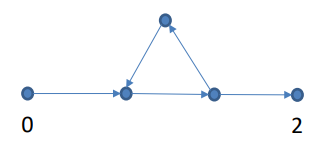 <br/> Suppose that we use the Depth First Search (DFS) method and in the case of a tie, we chose the smaller label. Find all labelling of these three nodes, where DFS will never reach to the goal! Discuss how DFS should be modified to avoid this situation?

By labelling the top label as a 1 the algorithm will always choose that direction and as such get stuck in an infinite loop. The easiest way to solve such a problem is to either use DFS on acyclic graphs or to remember previously visited nodes. However in such a case you might as well use BFS since the main benefit of DFS over BFS is the lower space complexity, which is lost when you store all previously visited nodes. 

One alternative algorithm is to use Iterative deepening depth-first search (IDDFS) which combines DFS's space-efficiency and BFS's ability to always find the goal. It works by running a depth-limited version of DFS repeatedly with increasing maximum depth limits until the goal is found. While IDDFS does visit states multiple times it might not be that costly for efficiency in for example large tree-like graphs, since the upper levels are so small in comparison to the bottom levels, so the time loss is not so costly.

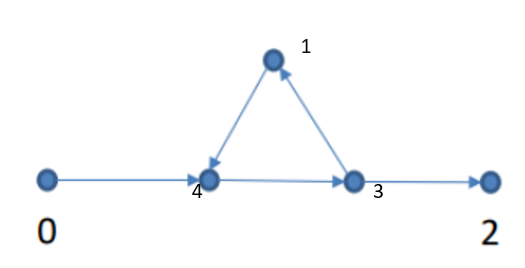

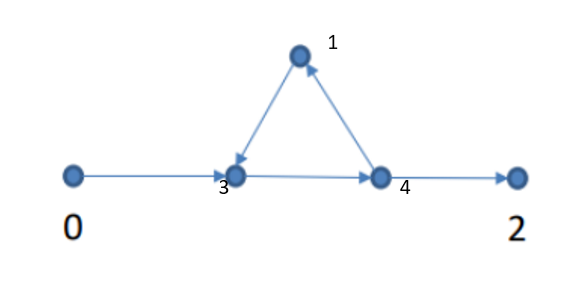

## 3) [2p] ...
### a) Suppose a teacher requests a customised textbook that covers the topics [introduction_to_AI, regression, classification] and that the algorithm always selects the leftmost topic when generating child nodes of the current node. Draw (by hand) the search space as a tree expanded for a lowest-cost-first search, until the first solution is found. This should show all nodes expanded. Indicate which node is a goal node, and which node(s) are at the frontier when the goal is found.


1. The leftmost topic Introduction_to_AI is covered by book1 and book3 and book1 costs less and as such is picked and book3 is added to the fronteir.

2. Regression is covered in book2 and book5 which both also cover classification, but book2 costs less and as such is picked and decided to be a goal since all topics are covered and book5 is added to the fronteir (depending on the order in which the goal is decided you could skip adding it to the fronteir)

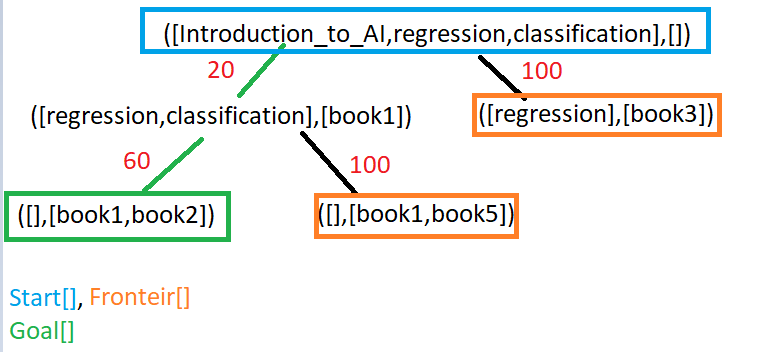

### b) Give a non-trivial heuristic function h that is admissible. <br> (h(n)=0 for all n is the trivial heuristic function. A heuristic function is said to be admissible if it never overestimates the cost of reaching the goal)

The amount of topics is generally an indicator of how well the algorithm is doing so setting the heuristic in a node to be "the amount of remaining topics" tells us if we're going in a good direction. In order to make this heuristic admissible we assume that each topic requires atleast one page to cover, otherwise we could have a book that covers 2 topics in one page and as such get an overestimation of the cost. This heuristic could also be improved upon in realistic scenarios by having a better estimate on the minimum amount of pages required per topic (then you could multiply the heuristic by that value).

_______

The first heuristic we described requires assumptions and doesn't make a great estimation since it underestimates the amount of pages for each topic in most cases. Therefore we also came up with a more complex one which is not as practical since it basically solves the assignment when calculating the heuristic, but it is nonetheless very accurate. 

*NOTE* if you required a single heuristic for the question you can regard the first one as our only heurisitc

We define our heuristic to look through the topics that are left, find the book combinations which covers all the topics and then choose the combination which is the cheapest.

For example:
Check h([Classification, Introduction_to_AI],[book4]):

1. book4 is already taken and as such is not considered for the combinations
2. **Classification** is covered by book2, book3 and book5 and **Introduction_to_AI** is covered by book1 and book3.
3. The available combinations are:

book2,book1 = 20+60 = 80

book2,book3 = 60+100 = 160

book3,book1 = 100+20 = 120

book3,book3 = 100+0 = 100 (book3 is already taken, so don't count it twice)

book5,book1 = 100+20 = 120

book5,book3 = 100+100 = 200

4. Decide the heuristic to be the cheapest, which is 80

This heuristic is not trivial and it is admissible as well since it always calculates the optimal combination. However it pretty much just solves the problem when it calculates the heuristic, therefore the simpler heuristic mentioned first would probably be preferable.


## 4) [3p] Consider the problem of finding a path in the grid shown below from the position s to the position g. A piece can move on the grid horizontally or vertically, one square at a time. No step may be made into a forbidden shaded area. Each square is denoted by the xy coordinate. For example, s is 43 and g is 36. Consider the Manhattan distance as the heuristic. State and motivate any assumptions that you make

### a) Write the paths stored and selected in the first five iterations of the A* algorithm, assuming that in the case of tie the algorithm prefers the path stored first. <br/>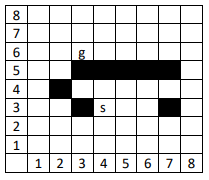

**Assumptions on implementation details:**

The neighbouring nodes of the current node will be checked and added to the priority queue in the order of North, East, South, West and ordered by `distance from s + the heuristic`. In the case of ties the node added first to the queue will rank higher. 
When the goal is found by backtracking through the previous column in the visited set. 


----------------
**Iteration 0**

<h6 align="center">Frontier</h6> 

|(x,y)|previous|dist from s| heurisic | dist from s + heuristic|
|-|-|-|-|-|
|(4,3)|START|0|4|4|

<h6 align="center">Visited</h6> 

|(x,y)|previous|dist from s| 
|-|-|-|
| | | |

----------------
**Iteration 1** - Current: (4,3)

<h6 align="center">Frontier</h6> 

|(x,y)|previous|dist from s| heurisic | dist from s + heuristic|
|-|-|-|-|-|
|(4,4)|(4,3)|1|3|4|
|(5,3)|(4,3)|1|5|6|
|(4,2)|(4,3)|1|5|6|

<h6 align="center">Visited</h6> 

|(x,y)|previous|dist from s| 
|-|-|-|
|(4,3)| START | 0 |

----------------
**Iteration 2** - Current: (4,4)

<h6 align="center">Frontier</h6> 

|(x,y)|previous|dist from s| heurisic | dist from s + heuristic|
|-|-|-|-|-|
|(3,4)|(4,4)|2|2|4|
|(5,3)|(4,3)|1|5|6|
|(4,2)|(4,3)|1|5|6|
|(5,4)|(4,4)|2|4|6|

<h6 align="center">Visited</h6> 

|(x,y)|previous|dist from s| 
|-|-|-|
|(4,3)| START | 0 |
|(4,4)|(4,3)  | 1 |

----------------
**Iteration 3** - Current: (3,4)

<h6 align="center">Frontier</h6> 

|(x,y)|previous|dist from s| heurisic | dist from s + heuristic|
|-|-|-|-|-|
|(5,3)|(4,3)|1|5|6|
|(4,2)|(4,3)|1|5|6|
|(5,4)|(4,4)|2|4|6|

<h6 align="center">Visited</h6> 

|(x,y)|previous|dist from s| 
|-|-|-|
|(4,3)| START | 0 |
|(4,4)| (4,3) | 1 |
|(3,4)| (4,4) | 2 |

----------------
**Iteration 4** - Current: (5,3)

<h6 align="center">Frontier</h6> 

|(x,y)|previous|dist from s| heurisic | dist from s + heuristic|
|-|-|-|-|-|
|(4,2)|(4,3)|1|5|6|
|(5,4)*|(4,4)|2|4|6|
|(6,3)|(5,3)|2|6|8|
|(5,2)|(5,3)|2|6|8|

*(5,4) already exists with the same distance from S and is therefore not added again nor modified

<h6 align="center">Visited</h6> 

|(x,y)|previous|dist from s| 
|-|-|-|
|(4,3)| START | 0 |
|(4,4)| (4,3) | 1 |
|(3,4)| (4,4) | 2 |
|(5,3)| (4,3) | 1 |

----------------
**Iteration 5** - Current: (4,2)

<h6 align="center">Frontier</h6> 

|(x,y)|previous|dist from s| heurisic | dist from s + heuristic|
|-|-|-|-|-|
|(5,4)|(4,4)|2|4|6|
|(3,2)|(4,2)|2|4|6|
|(6,3)|(5,3)|2|6|8|
|(5,2)*|(5,3)|2|6|8|
|(4,1)|(4,2)|2|6|8|

*(5,2) already exists with the same distance from S and is therefore not added again nor modified

<h6 align="center">Visited</h6> 

|(x,y)|previous|dist from s| 
|-|-|-|
|(4,3)| START | 0 |
|(4,4)| (4,3) | 1 |
|(3,4)| (4,4) | 2 |
|(5,3)| (4,3) | 1 |
|(4,2)| (4,3) | 1 |

### b) Solve this problem using the software in http://qiao.github.io/PathFinding.js/visual/ Use Manhattan distance, no diagonal step and compare A*, BFS and Best-first search. Describe your observations. Explain how each of these methods reaches the solution. Discuss the efficiency of each of the methods for this situation/scenario

Assumptions/Comments:

* We added the outer borders according to the image from 4a (the only difference without the borders would be that BFS would be even worse)

* As stated in the question we used manhattan distance and no diagonal step for all algorithms

Results: 

|Algorithm|Length of path|n Operations|
|-|-|-|
|A*|10|67|
|BFS|10|119|
|Best-first search|10|44|

We see that all algorithms found the paths of the same length and that Best-first search was the fastest since this algorithm only sorts the nodes on the frontier by the heuristic and even tho it is the fastest this algorithm will not always find the shortest path (as shown in part c) ). 

Slowest of the three alorithms was BFS (even if it was helped greatly by the additions of the outer borders). Even if it is slow BFS will always find the shortest path (as long as all edges have the same cost) and is the simplest of the three algorithms to implement since it does not require any heuristic. 

A\* is the great middleground, by ordering the nodes on the frontier by the distance from start + the heuristic. Hence it will be abit slower than best-first search but it can be proven that A\* always finds the shortest path with an admissible heuristic. Therefore A\* is very commonly used for shortest path calucations. 

A*

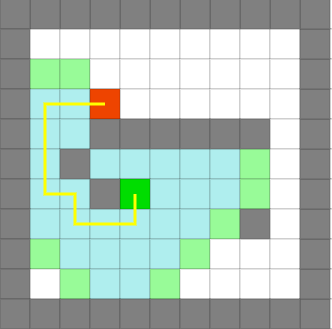

BFS

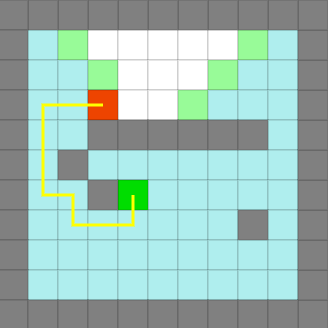

Best-first Search

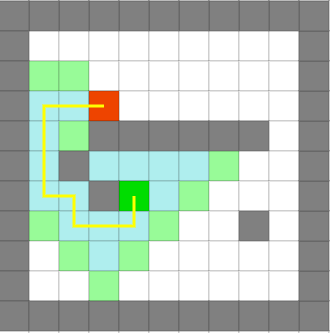

### c) Using a board like the board used in question 4a) or in http://qiao.github.io/PathFinding.js/visual/, describe and draw a situation/scenario where Breadth-first search would find a shorter path to the goal compared to Greedy best-first search. Consider that a piece can move on the grid horizontally or vertically, but not diagonally. Explain why Breadth-first search finds a shorter path in this case.

In the example created below Best-first search will not find the shortest path but is much faster than BFS.

The left path will always have a decent heuristic, hence Best-first search will explore this path. The right path has a bad heuristic initially however since it turns around and moves directly towards the goal it becomes the shortest. Best-first search does not find the right path since it only follows paths with the shortest heuristic. Breadth-first search will however always check the shortest paths first and will therefore find the shorter path to the right, even though it might take more operations.

Therefore the greedy best-first search is not a good choice if you want to be certain that you always take the shortest path, but it can be viable if the most important measurement is the algorithm's complexity.

BFS (path length 14)

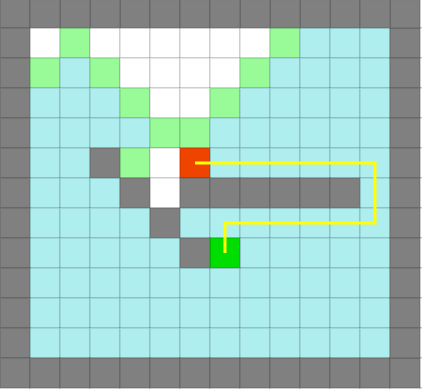

Best-first search (path length 16)

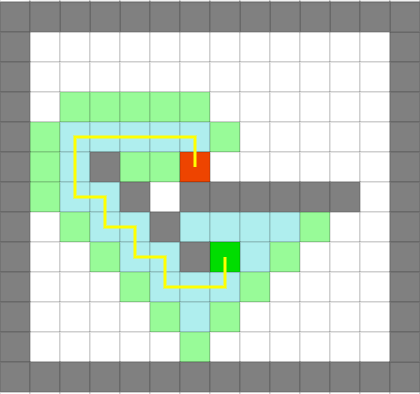

## 5) [2p] This question is about the relation of Markov decision processes in Assignment 5 and search algorithms.

### a) Discuss when and how the generic search problem can be described as a Markov decision process (MDP).

We start by converting the search space of a search problem to the state space of the markov decision process. Then we add actions in each state such that you have a binary probability of 1 or 0 to reach the adjacent state dependent on if there is a wall there. For example in 4a the starting node has a 100% chance to move to (4,4),(5,3),(4,2) depending on if they take the actions a_1, a_2 or a_3 respectively, but if they take the action a_4 which moves to (2,4) it has a 0% probability reach it and instead loops back to (4,3) with a 100% probability. We could also disregard the actions which goes towards a wall and instead see the search space initially as a graph which only has an edge towards the allowed locations. Formulating the search problem in this way makes it a subset of the Markov Decision Process and it should therefore always be possible to describe a generic search problem as a Markov Decision Process, in the cases where the search space is discreet (since that would require MDP to do an infinite amount of calculations).

In search problems one could convert the search problem by letting the rewards for each edge traversal be the inverse of the edge cost. When value iteration maximizes the rewards the edge costs would be minimized and hence it calculates the shortest path.

### b) When the search problem can be written as an MDP, what are the advantages and disadvantages of the value iteration algorithm over the A* algorithm?

The biggest advantage of MDP's value iteration is that it finds the shortest path for all nodes to the goal. This is a rather slow calculation if you want to be reasonably certain that value iteration finds an optimal policy. 

If you want to store the paths from many locations to a few it can still be faster than A*. 

In theory you could store the optimal path from every node to every node in an n by n grid resulting in an n^2 space complexity. If you calculate this grid in preprocessing you could get an extremely fast runtime. This grid is also calculable by A\*, but it would probably be a slower calculation since you need to do n^2 runs of the A\* algorithm compared to n runs of value iteration (where n is the amount of nodes in the search space).

Since value iteration does calculations on the entire search space it requires a discreet space to not have an infinite amount of calculations per iteration.